<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 177.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 184.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 126.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 135.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 137.7 MB/s eta 0:00:00


#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




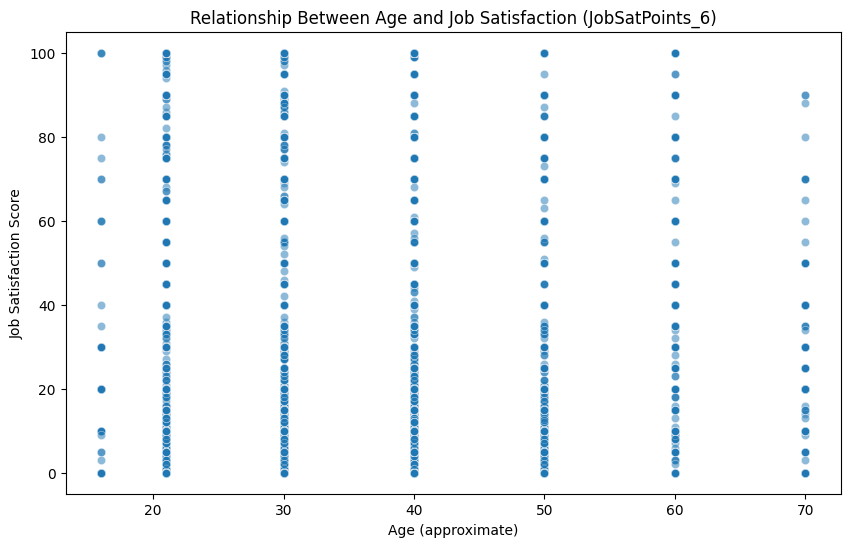

In [24]:
## Write your code here
#df_Age_JSP6 = df[['Age', 'JobSatPoints_6']]

#convert Age to numeric
df['AgeNumeric'] = df['Age'].replace({
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None
})

#Clean the data
df_Age_JSP6 = df[['AgeNumeric','JobSatPoints_6']].dropna()
                  
#plot 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_Age_JSP6, x='AgeNumeric', y='JobSatPoints_6', alpha=0.5)
plt.title('Relationship Between Age and Job Satisfaction (JobSatPoints_6)')
plt.xlabel('Age (approximate)')
plt.ylabel('Job Satisfaction Score')
#.grid(True)
plt.show()


#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


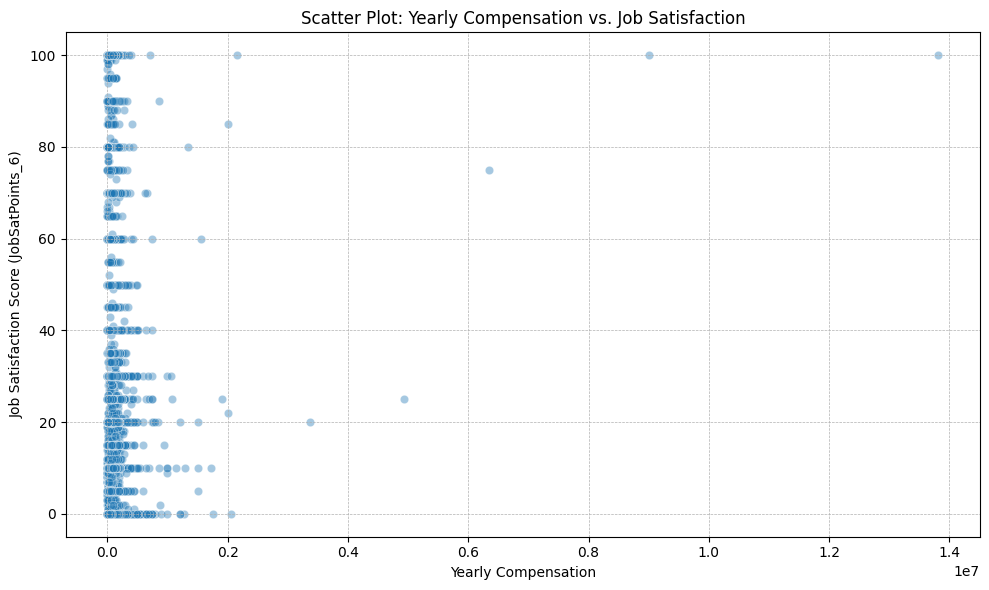

In [25]:
# Drop missing values in required columns
df_filtered = df[['ConvertedCompYearly', 'JobSatPoints_6']].dropna()

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='ConvertedCompYearly', y='JobSatPoints_6', alpha=0.4)
# Labels and title
plt.title('Scatter Plot: Yearly Compensation vs. Job Satisfaction')
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction Score (JobSatPoints_6)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


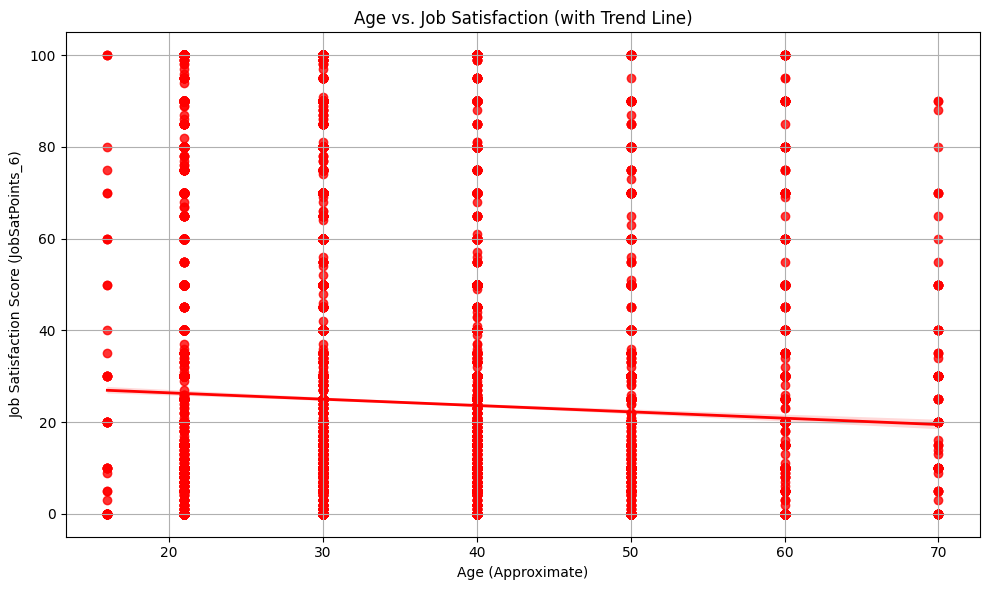

In [26]:
## Write your code here
#Clean the data
df_Age_JSP6 = df[['AgeNumeric', 'JobSatPoints_6']].dropna()

# Plot
plt.figure(figsize=(10, 6))
sns.regplot(data=df_Age_JSP6, x='AgeNumeric', y='JobSatPoints_6', color='red', line_kws={'linewidth':2})
plt.title('Age vs. Job Satisfaction (with Trend Line)')
plt.xlabel('Age (Approximate)')
plt.ylabel('Job Satisfaction Score (JobSatPoints_6)')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


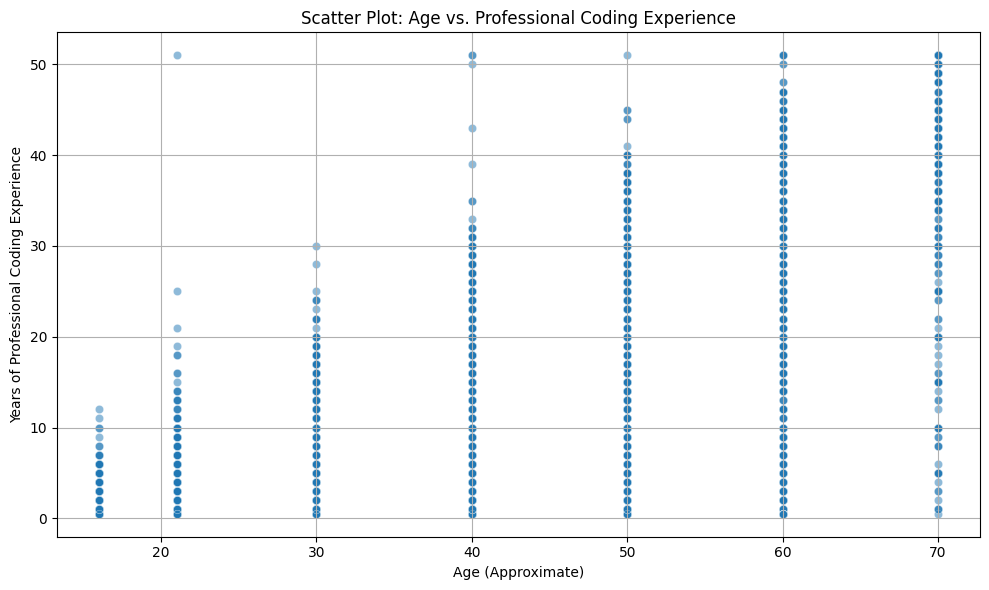

In [27]:
## Write your code here
#Replace special text values with numeric equivalents
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
})

# Convert the entire column to numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

#Drop missing values
df_Age_YCP = df[['AgeNumeric','YearsCodePro']].dropna()

#Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_Age_YCP, x='AgeNumeric', y='YearsCodePro', alpha=0.5)
plt.title('Scatter Plot: Age vs. Professional Coding Experience')
plt.xlabel('Age (Approximate)')
plt.ylabel('Years of Professional Coding Experience')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


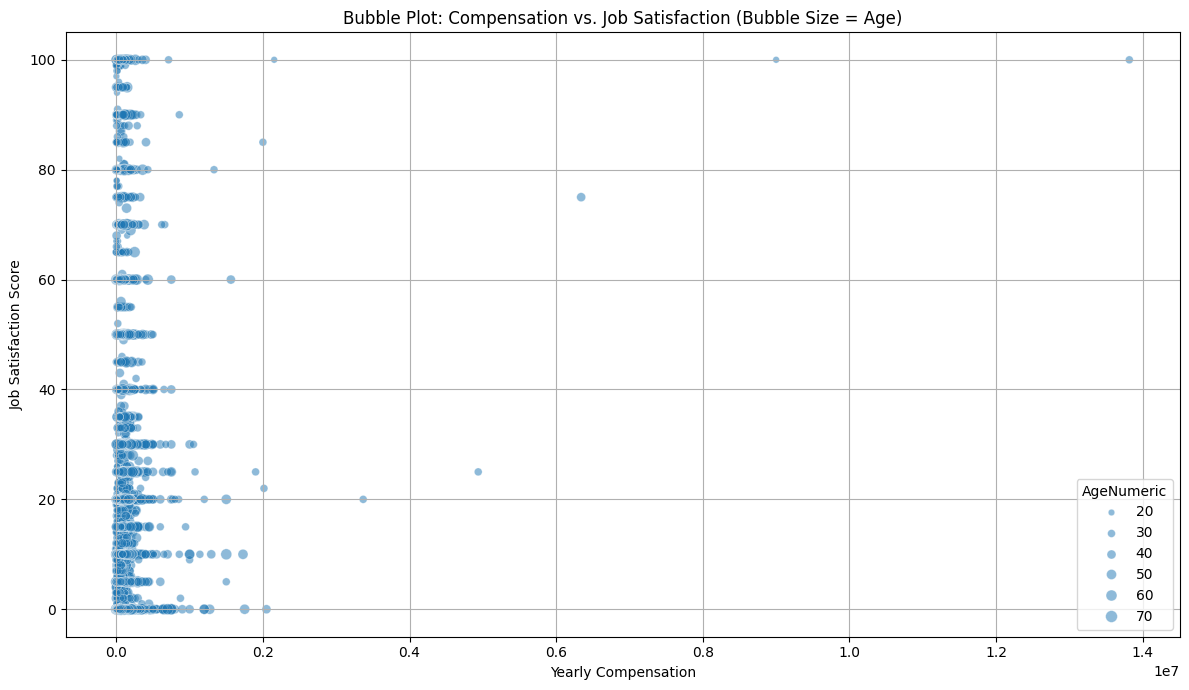

In [32]:
## Write your code here
# Filter data
df_CJA = df[['ConvertedCompYearly', 'JobSatPoints_6', 'AgeNumeric']].dropna()
# Plot
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df_CJA,
    x='ConvertedCompYearly',
    y='JobSatPoints_6',
    size='AgeNumeric',
    #sizes=(20, 400),  # min and max bubble size
    alpha=0.5,
    legend='brief')
plt.title('Bubble Plot: Compensation vs. Job Satisfaction (Bubble Size = Age)')
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction Score')
plt.grid(True)
plt.tight_layout()
plt.show()




#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


In [8]:
## Write your code here

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


/tmp/ipykernel_301/4217546967.py:21: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


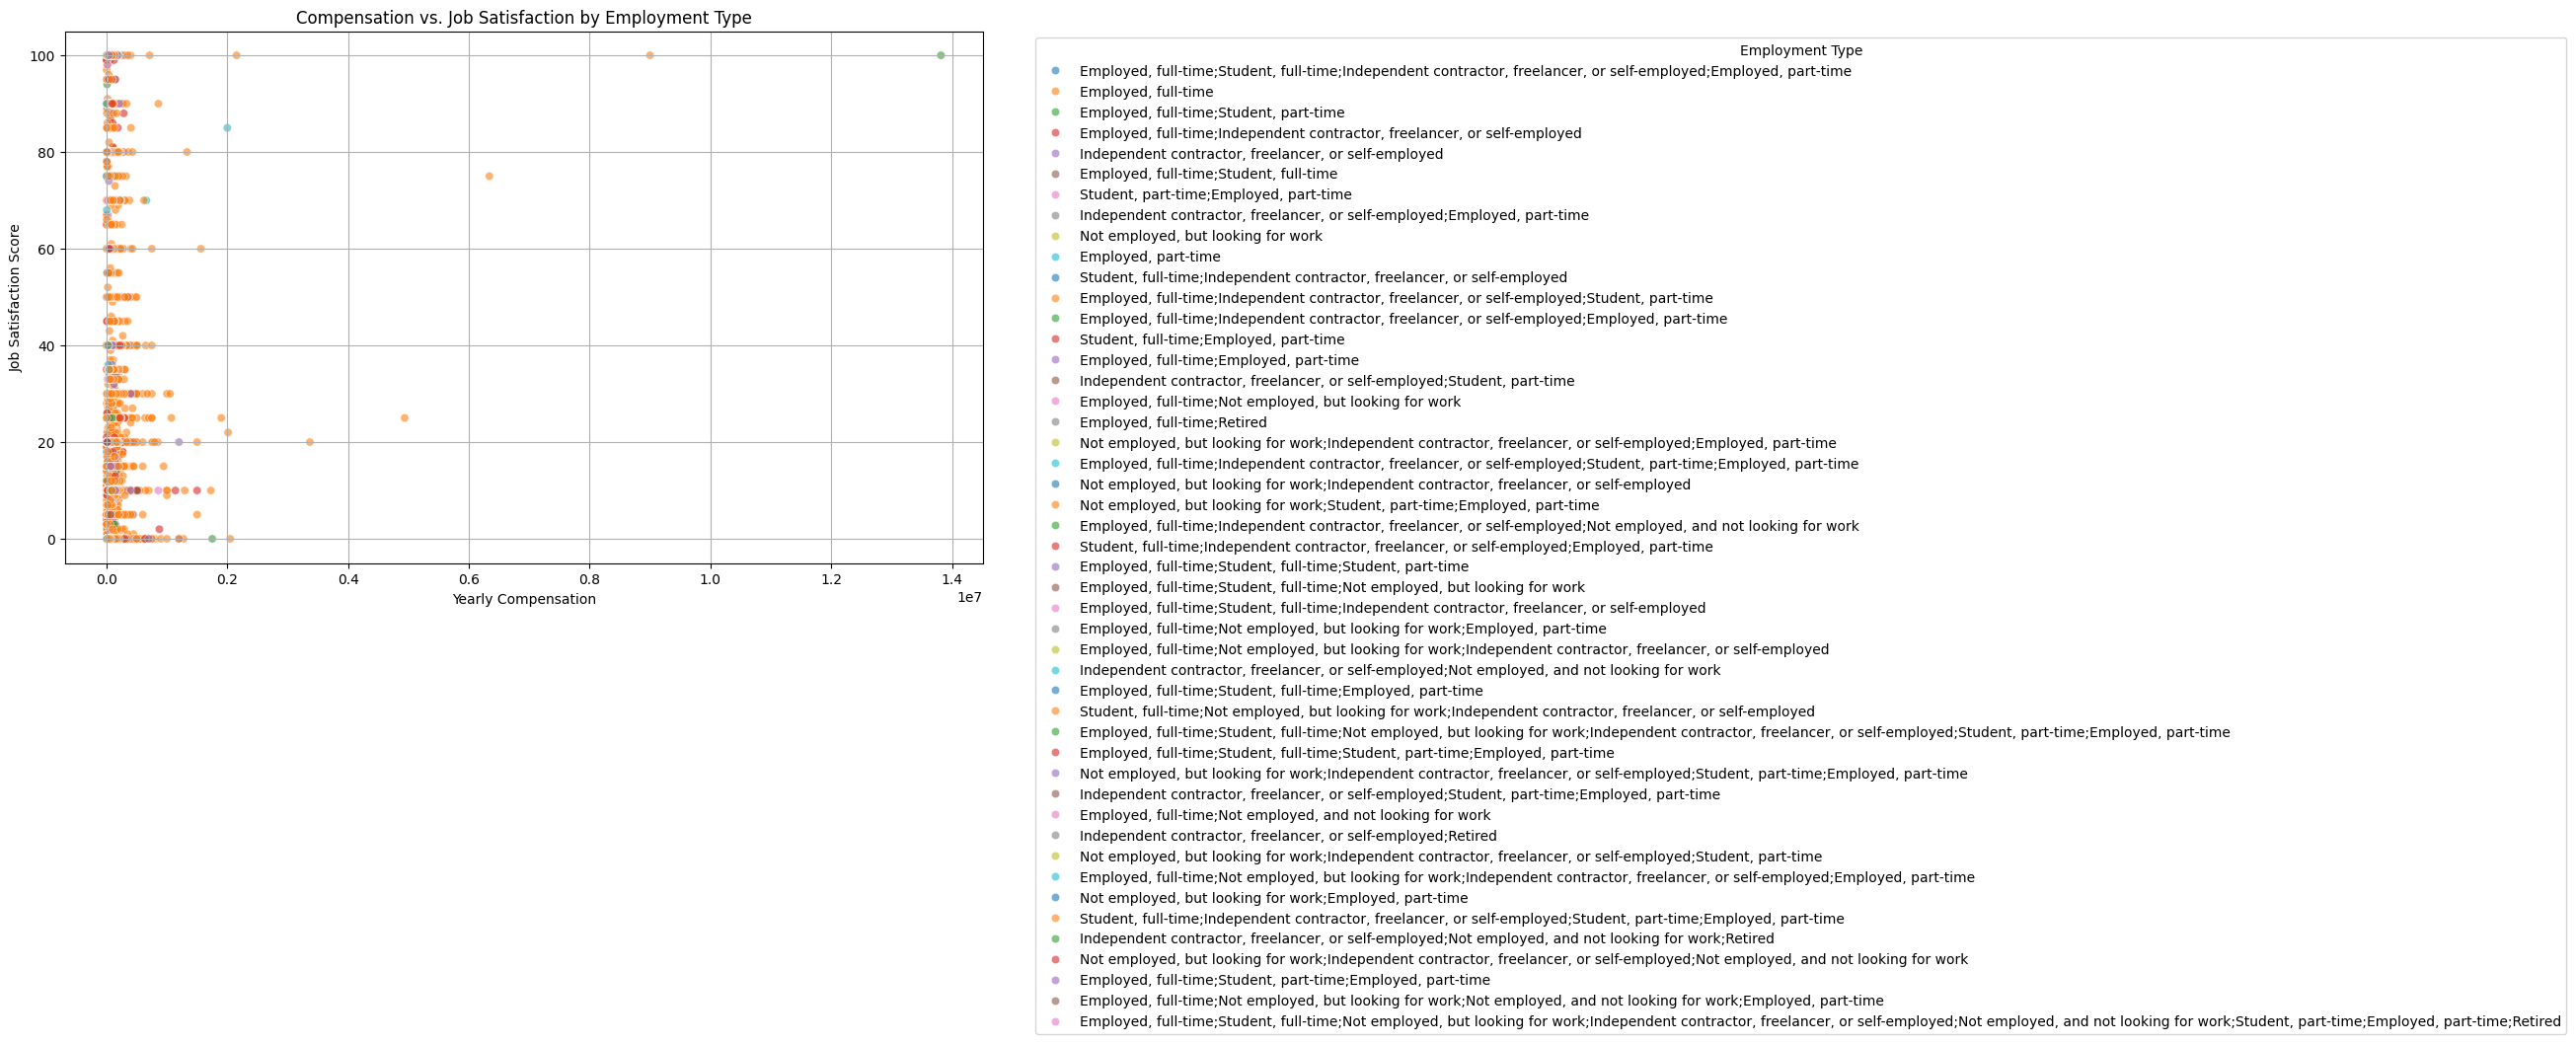

In [34]:
## Write your code here

# Filter necessary columns and remove missing values
df_CJE = df[['ConvertedCompYearly', 'JobSatPoints_6', 'Employment']].dropna()
#df_filtered = df_filtered[df_filtered['ConvertedCompYearly'] > 0]

# Plot
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df_CJE,
    x='ConvertedCompYearly',
    y='JobSatPoints_6',
    hue='Employment',
    alpha=0.6,
    palette='tab10')
plt.title('Compensation vs. Job Satisfaction by Employment Type')
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction Score')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


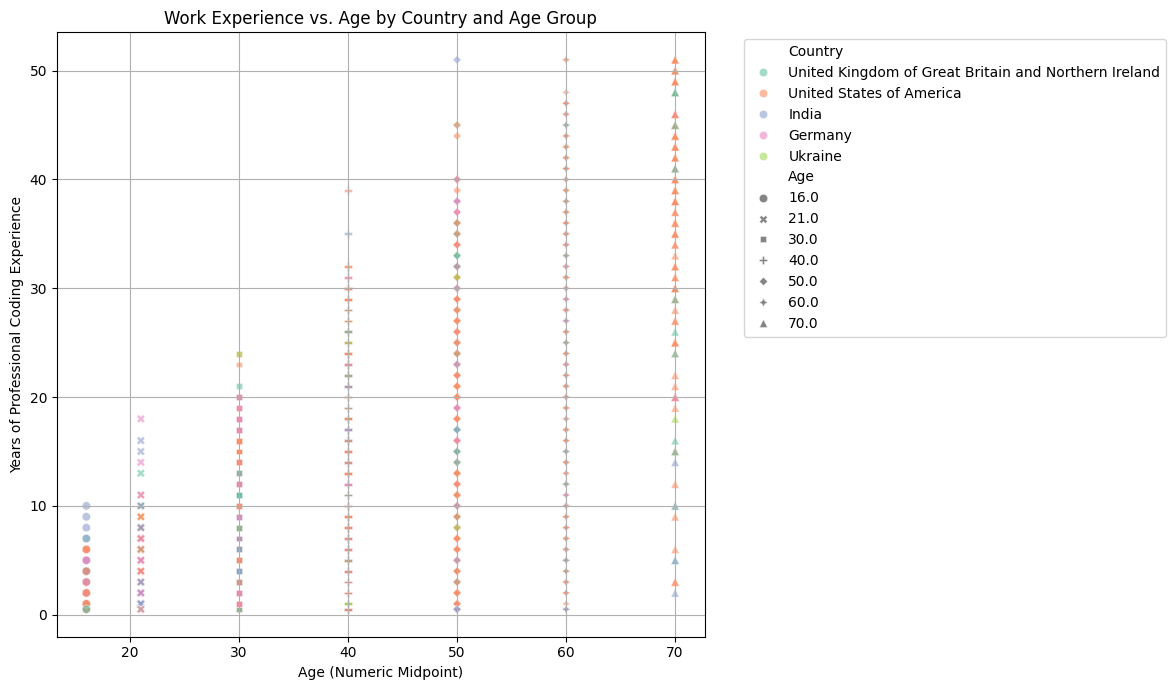

In [36]:
## Write your code here
# Step 3: Filter non-null, valid data
df_filtered = df[['Age', 'AgeNumeric', 'YearsCodePro', 'Country']].dropna()

# # Optional: Focus on top 5 countries by count
top_countries = df_filtered['Country'].value_counts().nlargest(5).index
df_filtered = df_filtered[df_filtered['Country'].isin(top_countries)]

# Step 4: Plot
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df_filtered,
    x='AgeNumeric',
    y='YearsCodePro',
    hue='Country',
    style='Age',       # Marker shape by age group
    alpha=0.6,
    palette='Set2')
# Labels and title
plt.title('Work Experience vs. Age by Country and Age Group')
plt.xlabel('Age (Numeric Midpoint)')
plt.ylabel('Years of Professional Coding Experience')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
